# HOML Ch 11 Tutorial

## Batch Normalization

In [ ]:
import tensorflow as tf

In [ ]:
# Loading fashion mnist dataset (10 class image dataset)
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full/255.0
X_test = X_test/255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
# Scale data
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
# Creating a model without Batch Normalization
model_wo_norm = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling the model
model_wo_norm.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

# Fitting the model
history_wo_norm = model_wo_norm.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8246 - accuracy: 0.7176 - val_loss: 0.5782 - val_accuracy: 0.8026
Epoch 2/5
1609/1719 [===========================>..] - ETA: 0s - loss: 0.5501 - accuracy: 0.8068

KeyboardInterrupt: ignored

In [ ]:
# Model's layers
model_wo_norm.summary()

In [ ]:
# Creating a model with Batch Normalization
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

# Fitting the model
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

In [ ]:
# Model's layers
model.summary()

## Avoiding overfitting through l1 and l2 regularization

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal',
                       kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal',
                       kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax',
                       kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

#  l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

## Transfer Learning

### What is transfer learning?

> Transfer learning is leveraging a working model's architecture and learned patterns for our own problem.

### Different types of transfer learning

* "As Is transfer learning" - Using an existing model with no changes what so ever (Eg. using Imagenet model on 1000 Imagenet classes, none of your own)

* "Feature Extraction transfer learning" - Use the prelearned patterns of an existing model (Eg. EfficientNetB0 trained on ImageNet) and adjust the output layer for your own problem (Eg. 1000 classes to 10 classes of food)

* "Fine tuning transfer learning" - Use the prelearned patterns of an existing model and 'fine-tune' many or all the underlying layers (including new output layers)

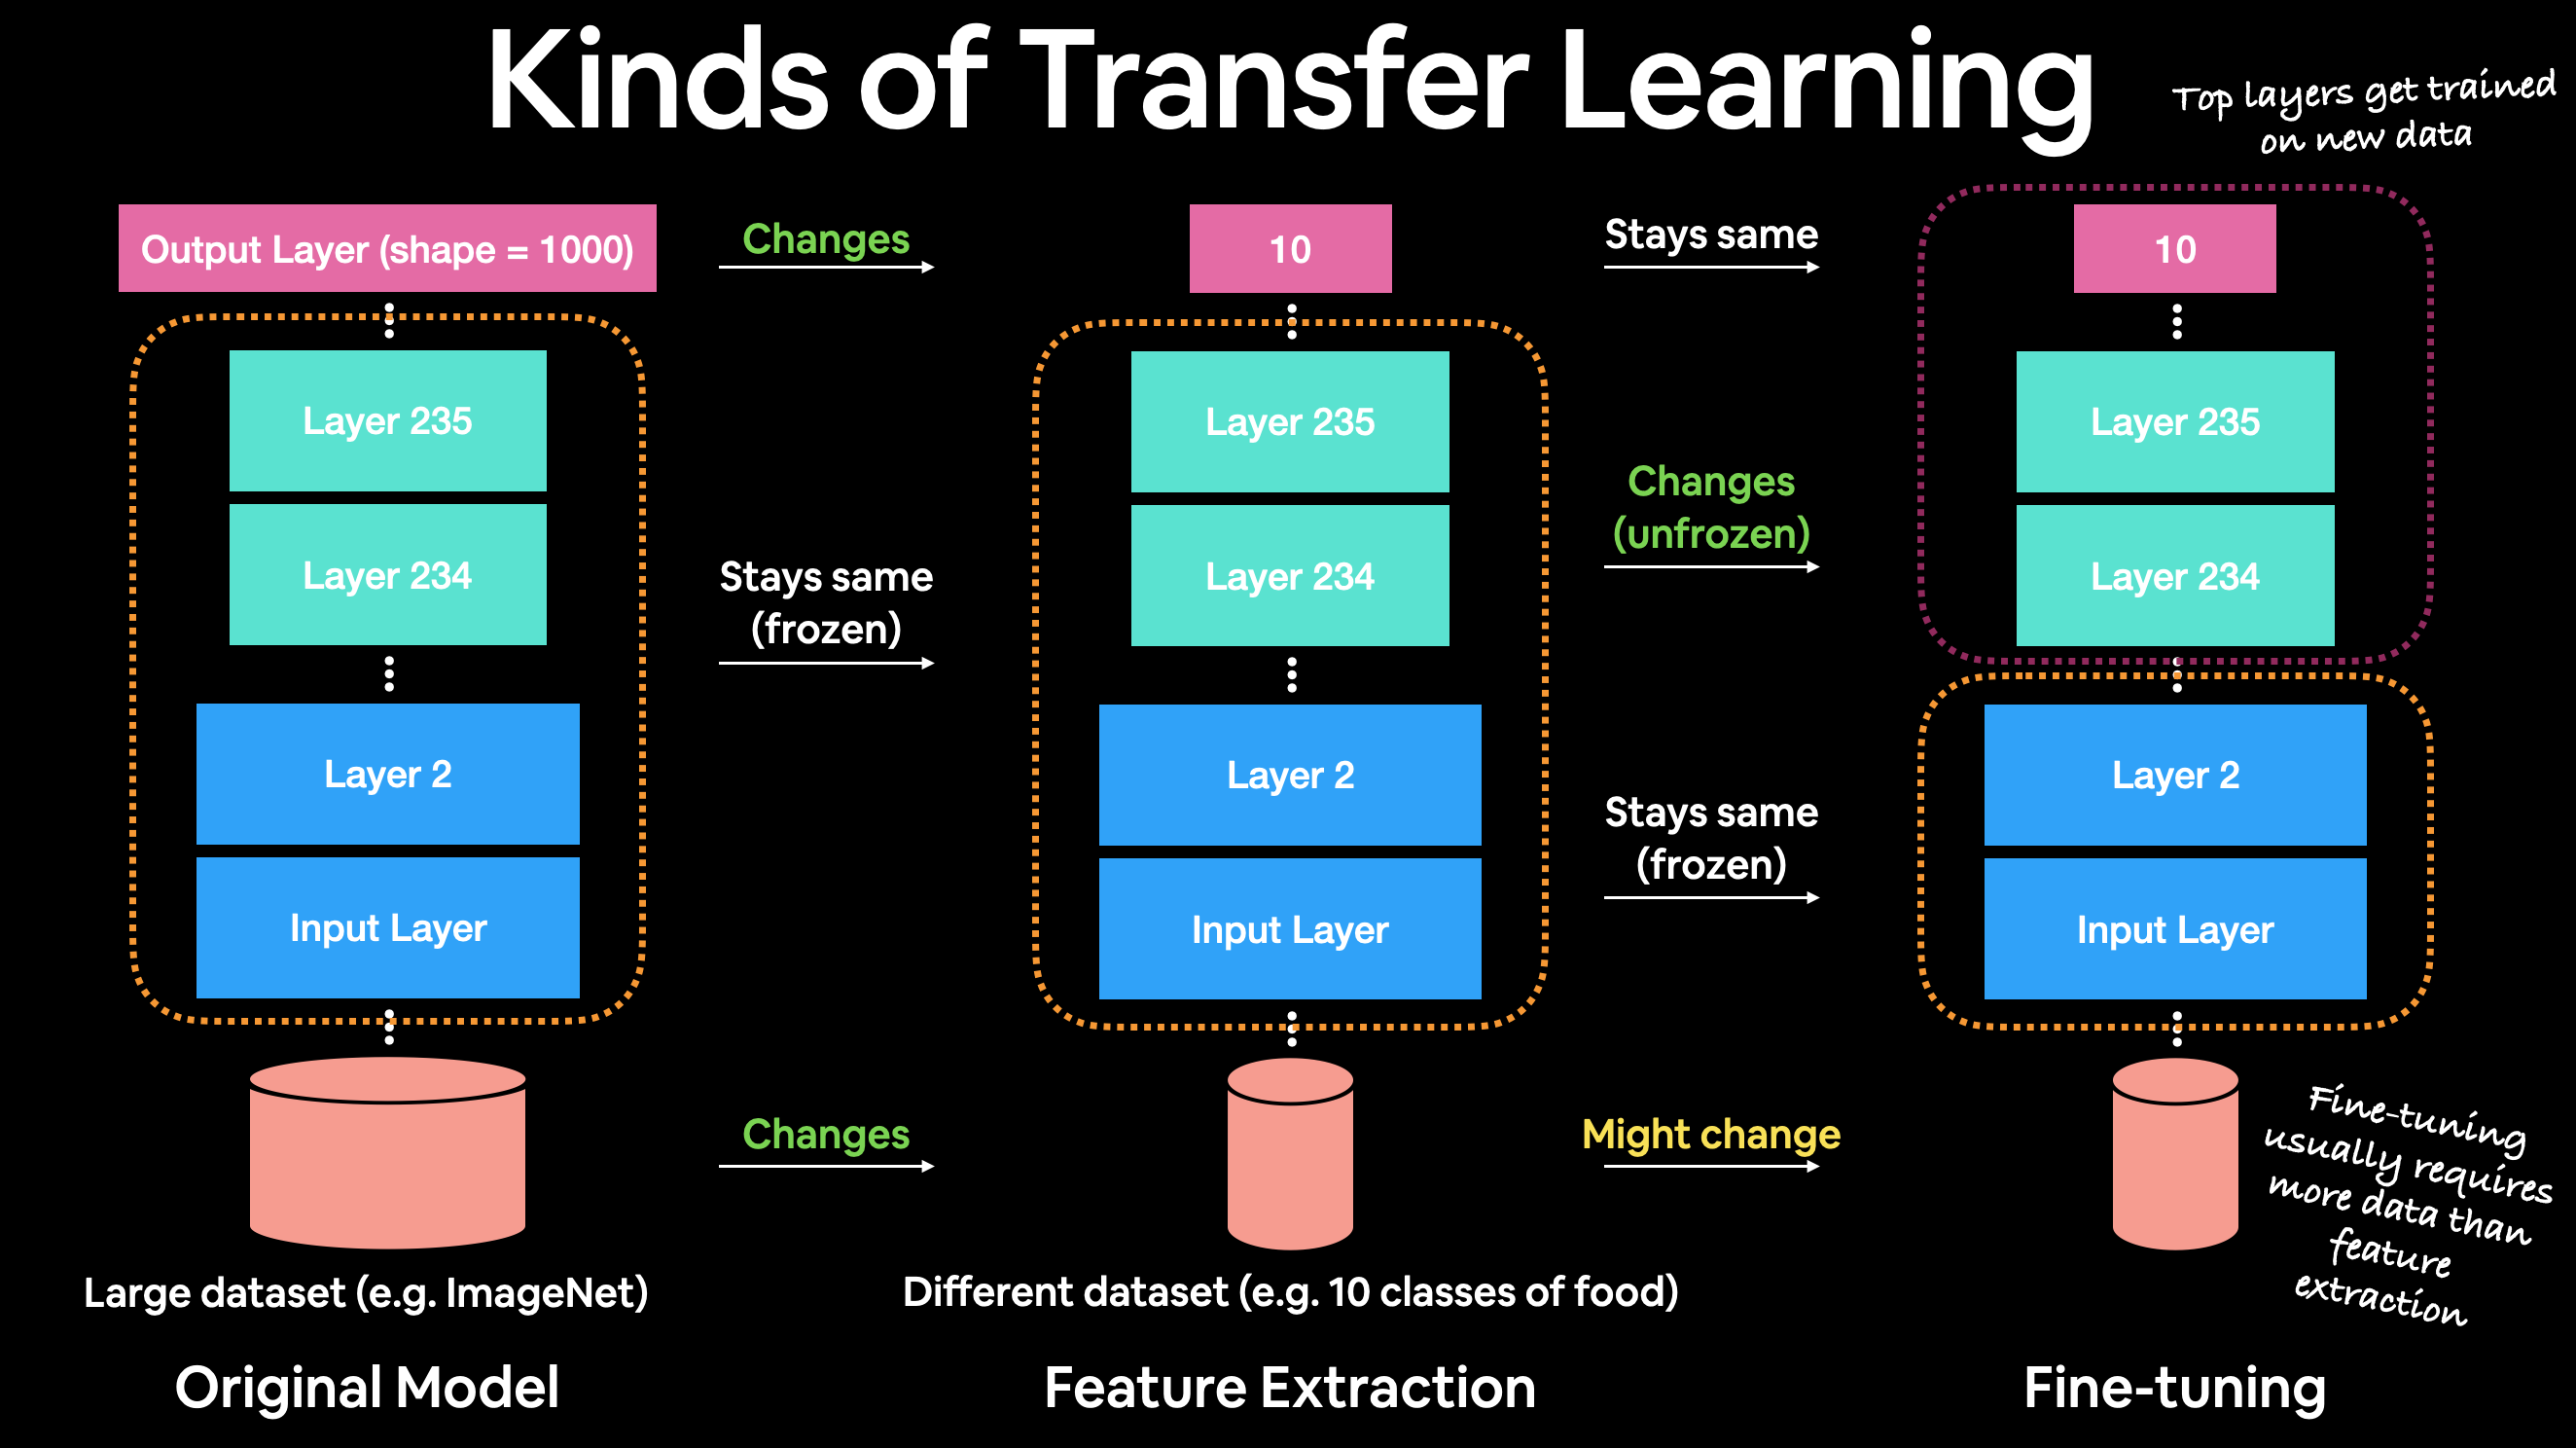

### TensorFlow Hub

* https://tfhub.dev/

### Evaluating performance of a model trained without transfer learning

Multi-Class Image Classification

1. Become one with the data
2. Preprocess the data
3. Create a model (baseline)
4. Fit the model (overfit it)
5. Evaluate the model
6. Adjust different parameter to improve the model (beat baseline/ reduce overfitting)
7. Repeat until satisfied


In [ ]:
# Are you using a GPU?
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip the data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()

--2022-09-19 12:56:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   157MB/s    in 3.2s    

2022-09-19 12:56:22 (157 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# walk through the 10 classes of image data
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} files in "{dirpath}"')

There are 2 directories and 0 files in "10_food_classes_all_data"
There are 10 directories and 0 files in "10_food_classes_all_data/train"
There are 0 directories and 750 files in "10_food_classes_all_data/train/chicken_wings"
There are 0 directories and 750 files in "10_food_classes_all_data/train/sushi"
There are 0 directories and 750 files in "10_food_classes_all_data/train/hamburger"
There are 0 directories and 750 files in "10_food_classes_all_data/train/pizza"
There are 0 directories and 750 files in "10_food_classes_all_data/train/fried_rice"
There are 0 directories and 750 files in "10_food_classes_all_data/train/chicken_curry"
There are 0 directories and 750 files in "10_food_classes_all_data/train/ramen"
There are 0 directories and 750 files in "10_food_classes_all_data/train/steak"
There are 0 directories and 750 files in "10_food_classes_all_data/train/ice_cream"
There are 0 directories and 750 files in "10_food_classes_all_data/train/grilled_salmon"
There are 10 directorie

In [ ]:
# setup train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
# let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  '''
  This function takes the directory name and an array containing different class names as input and visualizes a random image along with its label.
  '''


  # setup the target directory
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img);
  plt.title(target_class)
  plt.axis("off");

  # show the shape of the image
  print(f"Image shape: {img.shape}")

  return img;


In [ ]:
# visualise, visualise, visualise
import random
img = view_random_image(train_dir,
                        target_class=random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224))
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224))



In [ ]:
images,labels = train_data.next()
plt.axis(False)
plt.imshow(images[0])
plt.title(class_names[np.argmax(labels[0])])

In [ ]:
# imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [ ]:
# create a baseline model
model_without_transfer_learning = Sequential([
                       Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu',
                              input_shape=(224,224,3)),
                       MaxPool2D(pool_size=2),
                       Conv2D(32,3,activation='relu'),
                       MaxPool2D(pool_size=2),
                       Conv2D(32,3,activation='relu'),
                       
                       Conv2D(32,3,activation='relu'),
                       
                       Conv2D(32,3,activation='relu'),
                       
                       Conv2D(32,3,activation='relu'),
                       
                       Conv2D(32,3,activation='relu'),
                       MaxPool2D(pool_size=2),
                       Flatten(),
                       Dense(len(class_names), activation='softmax')
])

In [ ]:
model_without_transfer_learning.summary()

In [ ]:
# compile the model
model_without_transfer_learning.compile(loss=tf.keras.losses.categorical_crossentropy,
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [ ]:
# fit the model
history_model_without_transfer_learning = model_without_transfer_learning.fit(train_data,
             epochs=10,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

In [ ]:
model_without_transfer_learning.evaluate(test_data)

In [ ]:
# plot the training and validation curves seperately
def plot_loss_curves(history):
  '''
  Returns seperate loss curves for training and validation dataset
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize=(10,5))
  plt.title("Evaluation of model using plots")
  
  # plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel("Epochs")
  plt.legend()

  # plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel("Epochs")
  plt.legend()

In [ ]:
# evaluate the model
plot_loss_curves(history_model_without_transfer_learning)

In [ ]:
# Create a function to import image and resize it so that it can be given as input to our model
def load_and_prep_image(filename, img_shape=224):
  '''
  Reads an image, converts it to a tensor and reshapes it in (img_shape, img_shape, color_channel)
  '''
  # read in the image
  img = tf.io.read_file(filename) 

  # decode the read filee into a tensor
  img = tf.image.decode_image(img)

  # resize image
  img = tf.image.resize(img, size=[img_shape,img_shape])

  # normalize the image 
  img = img/255.

  return img

In [ ]:
def pred_and_plot_multiclass(model,filename,class_names=class_names):
  '''
  imports an image located at filename, makes a prediction with model, and plots the image with the predicted class as the title
  '''
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)

  # get the predicted class
  pred_class = class_names[np.argmax(pred)]

  # show image with prediction
  plt.figure(figsize=(15,5))
  
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title(f'Prediction : {pred_class}')
  plt.axis(False)

  plt.subplot(1,2,2)
  plt.barh(class_names, np.squeeze(pred),  )
  plt.title('Prediction Probabilities')


In [ ]:
# saving a model
model_without_transfer_learning.save('multiclass_food_classifier_model')

### Evaluating performance of a model trained with transfer learning(ResNet & EfficientNet)

In [ ]:
# get data (10% of 10 classes in food101 dataset)
import zipfile

# download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
# how many images in each folder
import os

# walkthrough the folder
for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in the path " {dirpath} "')

In [ ]:
# setup data input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# global variables
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

# dir_paths
train_dir = '/content/10_food_classes_10_percent/train/'
test_dir = '/content/10_food_classes_10_percent/test/'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Training images : ')
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode='categorical' )
print('Testing images :')
test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                        target_size=IMAGE_SHAPE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical')

In [ ]:
# Create tensorboard callback functionality (because we will need to do this for each model)
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'Saving TensorBoard log files to " {log_dir}"') 
  return tensorboard_callback

In [ ]:
# getting links of pretrained models from tensorflow hub 

resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [ ]:
# import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# let's create a function to create a model using a url
def create_model(model_url, num_classes=10):
  '''
  Takes a tensorflow hub url and create a keras sequential model with it.

  Args:
    model_url(str)- A tensorflow hub feature extration model url
    num_classes(int) - The number of classes we are working with.

  Returns:
    An uncompiled keras sequential model with model_url as feature extractor layer and dense output layer with num_classes output neuron.   
  '''
  # download the pretrained model and save it as a keras model
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,    # Freeze the already learned patterns
                                           name='Feature_Extraction_Layer',
                                           input_shape=IMAGE_SHAPE+(3,)) 
  
  # create our own model
  model = Sequential([
                      feature_extractor_layer,
                      Dense(10, activation='softmax', name='Output_Layer')
                      
  ])

  return model

#### Creating and testing Resnet TensorFlow Hub Feature Extraction Model

In [ ]:
# create Resnet model
resnet_model = create_model(model_url=resnet_url)

In [ ]:
resnet_model.summary()

In [ ]:
# plot the training and validation curves seperately
def plot_loss_curves(history):
  '''
  Returns seperate loss curves for training and validation dataset
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize=(10,5))
  plt.title("Evaluation of model using plots")
  
  # plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel("Epochs")
  plt.legend()

  # plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel("Epochs")
  plt.legend()

In [ ]:
# compile our resnet model
resnet_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# fit the resnet model
resnet_history = resnet_model.fit(train_data_10_percent,
                 epochs=5,
                 steps_per_epoch=len(train_data_10_percent),
                 validation_data=test_data_10_percent,
                 validation_steps=len(test_data_10_percent),
                 callbacks=[create_tensorboard_callback( dir_name='tensorflow_hub',
                                                        experiment_name='Resnet_v2_50')])

In [ ]:
import matplotlib.pyplot as plt

plot_loss_curves(resnet_history)

#### Creating and testing EfficientNetB0 TensorFlow Hub Feature Extraction Model

In [ ]:
# create efficientnet model
efficientnet_model = create_model( efficientnet_url)

In [ ]:
efficientnet_model.summary()

In [ ]:
# compile the model
efficientnet_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

In [ ]:
# fit the model
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                       epochs=5,
                       steps_per_epoch=len(train_data_10_percent),
                       validation_data=test_data_10_percent,
                       validation_steps=len(test_data_10_percent),
                       callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                        experiment_name='EfficientNetB0') ])

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
# upload tensorboard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name "EfficientNetB0 vs ResNet50V2" \
--description "Comparing 2 different TF Hub Feature Extraction Models architecture using 10% of 10 classes of food101" \
--one_shot

In [ ]:
pred_and_plot_multiclass(model_without_transfer_learning,'/content/dana-devolk-5-RS_ScO3X4-unsplash.jpg')

In [ ]:
pred_and_plot_multiclass(resnet_model,'/content/dana-devolk-5-RS_ScO3X4-unsplash.jpg')

In [ ]:
pred_and_plot_multiclass(efficientnet_model,'/content/dana-devolk-5-RS_ScO3X4-unsplash.jpg')

In [ ]:
pred_and_plot_multiclass(model_without_transfer_learning,'/content/eiliv-sonas-aceron-Op6iy0YoYzg-unsplash.jpg')

In [ ]:
pred_and_plot_multiclass(resnet_model,'/content/eiliv-sonas-aceron-Op6iy0YoYzg-unsplash.jpg')

In [ ]:
pred_and_plot_multiclass(efficientnet_model,'/content/eiliv-sonas-aceron-Op6iy0YoYzg-unsplash.jpg')

In [ ]:
pred_and_plot_multiclass(model_without_transfer_learning,'/content/saahil-khatkhate-kfDsMDyX1K0-unsplash.jpg')

In [ ]:
pred_and_plot_multiclass(resnet_model,'/content/saahil-khatkhate-kfDsMDyX1K0-unsplash.jpg')

In [ ]:
pred_and_plot_multiclass(efficientnet_model,'/content/saahil-khatkhate-kfDsMDyX1K0-unsplash.jpg')